# Import The Libraries

In [69]:
import numpy as np

import matplotlib.pyplot as plt
import matplotlib as mpl

from sklearn.preprocessing import add_dummy_feature
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import PolynomialFeatures


# Make and Take a look at the data

In [43]:
np.random.seed(42)                    # to make this code example reproducible
m = 100                               # number of instances
X = 2 * np.random.rand(m, 1)          # column vector
y = 4 + 3 * X + np.random.randn(m, 1) # column vector

Text(0, 0.5, '$y$')

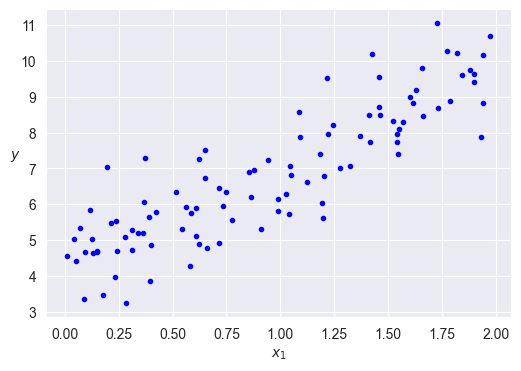

In [44]:
plt.figure(figsize=(6, 4))
plt.plot(X , y , 'b.')
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)

# Minimizing The Cost Function By Normal Function


In [45]:
X_b = add_dummy_feature(X)        # add x0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y

In [46]:
theta_best

array([[4.21509616],
       [2.77011339]])

In [47]:
X_new = np.array([[0] , [2]])       # small test set
X_new_b = add_dummy_feature(X_new)  # add x0 = 1 to each instance
y_predict = X_new_b @ theta_best

In [48]:
y_predict

array([[4.21509616],
       [9.75532293]])

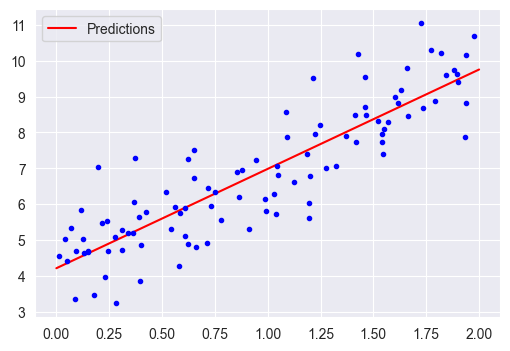

In [49]:
plt.figure(figsize=(6, 4))
plt.plot(X_new, y_predict, "r-", label="Predictions")
plt.plot(X, y, "b.")
plt.legend(loc="upper left")

In [50]:
lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_ , lin_reg.coef_ # the same as theta_best

(array([4.21509616]), array([[2.77011339]]))

In [51]:
lin_reg.predict(X_new)

array([[4.21509616],
       [9.75532293]])

In [52]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[4.21509616],
       [2.77011339]])

# Minimizing The Cost Function Using Gradient Descent

### Batch Gradient Descent

In [53]:
eta = 0.1
n_epochs = 1000
m = len(X_b)

In [54]:
np.random.seed(42)
theta = np.random.randn(2, 1)

In [55]:
for epoch in range(n_epochs):
    gradients = (2/m) * X_b.T @ (X_b @ theta - y)
    theta = theta - eta*gradients

In [56]:
 theta

array([[4.21509616],
       [2.77011339]])

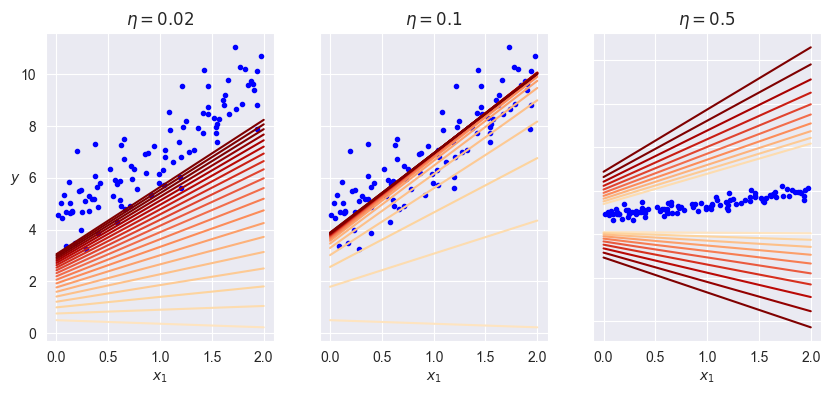

In [57]:
def plot_gradient_descent(theta, eta):
    m = len(X_b)
    plt.plot(X, y, "b.")
    n_epochs = 1000
    n_shown = 20
    theta_path = []
    for epoch in range(n_epochs):
        if epoch < n_shown:
            y_predict = X_new_b @ theta
            color = mpl.colors.rgb2hex(plt.cm.OrRd(epoch / n_shown + 0.15))
            plt.plot(X_new, y_predict, linestyle="solid", color=color)
        gradients = 2 / m * X_b.T @ (X_b @ theta - y)
        theta = theta - eta * gradients
        theta_path.append(theta)
    plt.xlabel("$x_1$")
    plt.title(fr"$\eta = {eta}$")
    return theta_path

np.random.seed(42)
theta = np.random.randn(2, 1)  # random initialization

plt.figure(figsize=(10, 4))
plt.subplot(131)
plot_gradient_descent(theta, eta=0.02)
plt.ylabel("$y$", rotation=0)
plt.subplot(132)
theta_path_bgd = plot_gradient_descent(theta, eta=0.1)
plt.gca().axes.yaxis.set_ticklabels([])
plt.subplot(133)
plt.gca().axes.yaxis.set_ticklabels([])
plot_gradient_descent(theta, eta=0.5)
plt.show()

### stochastic Gradient Descent using simple learning schedule

In [58]:
n_epochs = 50      # we’ll go through the dataset 50 times in total.
t0 , t1 = 5,50     # These control how fast the learning rate (η) decreases over time.
# Think of t0 as the “starting energy” and t1 as a “cooling speed”.

In [59]:
def learning_schedule(t):
    return t0 / (t + t1)

In [60]:
np.random.seed(42)
theta = np.random.randn(2,1)  # random initialization

In [61]:
for epoch in range(n_epochs):
    for iteration in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index : random_index + 1]
        yi = y[random_index : random_index + 1]
        gradients = 2 * xi.T @ (xi @ theta - yi) # for SGD, do not divide by m
        eta = learning_schedule(epoch * m + iteration)
        theta = theta - eta * gradients

In [62]:
theta

array([[4.21076011],
       [2.74856079]])

In [64]:
sgd_reg = SGDRegressor(max_iter=1000 , tol = 1e-5 , penalty= None
                       , eta0 = 0.01 , n_iter_no_change= 100 , random_state = 42 )
sgd_reg.fit(X, y.ravel()) # y.ravel() because fit() expects 1D targets

,loss,'squared_error'
,penalty,None
,alpha,0.0001
,l1_ratio,0.15
,fit_intercept,True
,max_iter,1000
,tol,1e-05
,shuffle,True
,verbose,0
,epsilon,0.1
,random_state,42


In [65]:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.21278812]), array([2.77270267]))

# Polynomial Regression


In [66]:
np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X ** 2 + X + 2 + np.random.randn(m, 1)

Text(0, 0.5, '$y$')

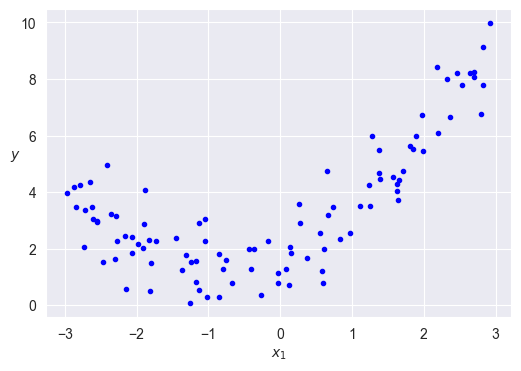

In [67]:
plt.figure(figsize=(6, 4))
plt.plot(X , y , 'b.')
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)

In [70]:
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

In [71]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([1.78134581]), array([[0.93366893, 0.56456263]]))

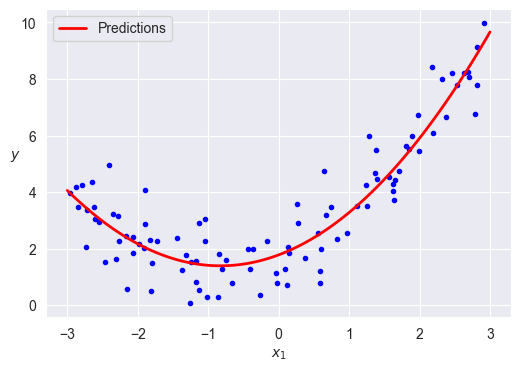

In [72]:
X_new = np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)

plt.figure(figsize=(6, 4))
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.legend(loc="upper left")
plt.show()